In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

2025-08-11 23:16:27.895688: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-11 23:16:28.877980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754928989.449973   13227 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754928989.474205   13227 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754928990.126490   13227 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
root_dir = r"/home/sumo/Proj/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered"

In [ ]:
BATCH_SIZE  = 32
EPOCHS = 30
input_img_size = (128,128)
input_shape = (128,128,3)
dropout_rate = 0.2

In [4]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/test",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)

Found 2752 files belonging to 2 classes.


I0000 00:00:1754929000.156770   13227 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3584 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 248 files belonging to 2 classes.


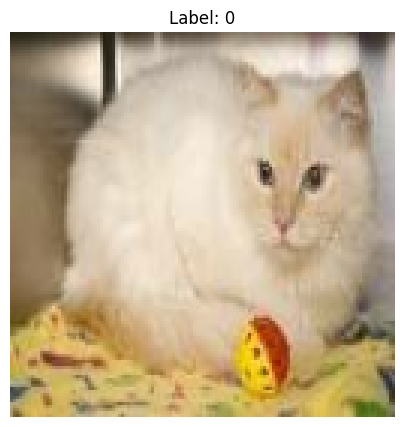

In [6]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(5,5))
    plt.imshow(images[0].numpy() / 255.)  # normalize if not already
    plt.title(f"Label: {int(labels[0])}")   
    plt.axis('off')
    plt.show()
    break

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout, BatchNormalization, Input

model = Sequential([

    Input(shape=input_shape),

    Conv2D(16, (3, 3), activation='relu', padding='same'),  # 1. Conv2D
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dropout(dropout_rate),

    Dense(1, activation='sigmoid') 

])

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,049 (148.63 KB)

 Trainable params: 37,953 (148.25 KB)

 Non-trainable params: 96 (384.00 B)

In [9]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/10


I0000 00:00:1754929005.645083   13370 service.cc:152] XLA service 0x72575c002bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754929005.645195   13370 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-08-11 23:16:45.721654: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754929006.008471   13370 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/86 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6328 - loss: 0.9356

I0000 00:00:1754929011.060209   13370 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.6116 - loss: 1.0974 - val_accuracy: 0.5847 - val_loss: 0.9434
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7852 - loss: 0.5493 - val_accuracy: 0.5887 - val_loss: 0.9231
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8576 - loss: 0.3437 - val_accuracy: 0.5968 - val_loss: 1.0627
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9102 - loss: 0.2112 - val_accuracy: 0.6935 - val_loss: 0.9742
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9364 - loss: 0.1681 - val_accuracy: 0.6492 - val_loss: 1.0486
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9469 - loss: 0.1335 - val_accuracy: 0.6411 - val_loss: 1.0420
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.0880 - val_accuracy: 0.6371 - val_loss: 1.1313
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.6452 - val_loss: 1.1219
E

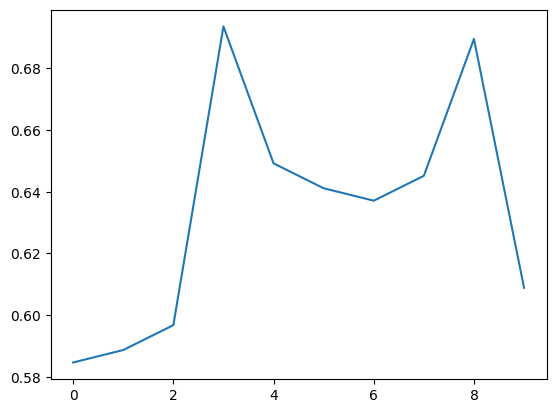

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(val_acc)

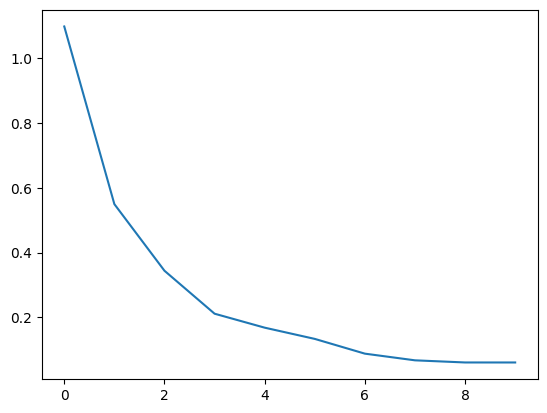

In [11]:
plt.plot(loss)

In [12]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6089 - loss: 1.3789 
Validation Loss: 1.3789
Validation Accuracy: 0.6089


In [13]:
BATCH_SIZE
input_shape

(128, 128, 3)

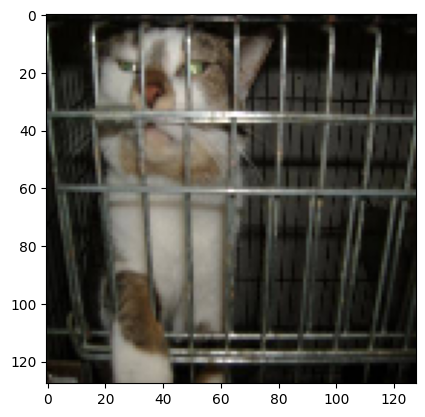

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/home/sumo/Proj/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered/test/cats/cat.2366.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [15]:
class_names = train_ds.class_names

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [16]:
class_names

['cats', 'dogs']

In [17]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


np.float32(0.0052301264)

In [18]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: cats with confidence 0.01


### Model Saving

In [19]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML051_Kaung_Khant_Paing


In [20]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [21]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = train_ds.class_names

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
